In [32]:
import time
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import quandl
quandl.ApiConfig.api_key = 'JgrixskwB3MtGDkJtxms'
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
ser = pd.Series(np.random.random(5), name="Column 01")

In [5]:
ser

0    0.973084
1    0.169255
2    0.661954
3    0.954301
4    0.135987
Name: Column 01, dtype: float64

In [6]:
ser[2]

0.66195437960626824

In [7]:
PG = wb.DataReader('PG', data_source='yahoo', start='1995-01-01')

In [11]:
PG.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-10-09,92.400002,92.620003,91.930000,92.120003,92.120003,5149000
2017-10-10,92.370003,93.040001,89.860001,91.620003,91.620003,17125600
2017-10-11,91.089996,91.730003,91.070000,91.459999,91.459999,7115400
2017-10-12,91.410004,92.309998,91.389999,92.150002,92.150002,5984900
2017-10-13,92.699997,93.510002,92.589996,93.040001,93.040001,6915200


In [13]:
PG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5738 entries, 1995-01-03 to 2017-10-13
Data columns (total 6 columns):
Open         5738 non-null float64
High         5738 non-null float64
Low          5738 non-null float64
Close        5738 non-null float64
Adj Close    5738 non-null float64
Volume       5738 non-null int64
dtypes: float64(5), int64(1)
memory usage: 473.8 KB


In [12]:
PG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5738.000000,5738.000000,5738.000000,5738.000000,5738.000000,5.738000e+03
mean,55.473902,55.923117,55.047753,55.514055,43.453505,8.449334e+06
std,19.340206,19.387344,19.295569,19.335225,21.314218,5.979626e+06
min,15.156250,15.406250,15.156250,15.218750,8.810512,6.142000e+05
25%,42.250000,42.720312,41.751250,42.343750,26.842979,5.186350e+06
50%,55.980000,56.375000,55.534999,56.000000,40.319614,7.261300e+06
75%,67.510002,67.965000,67.042502,67.517498,54.394191,1.007185e+07
max,94.169998,94.669998,93.830002,94.400002,94.400002,1.372872e+08


In [21]:
wb.DataReader('MSFT',data_source='yahoo',start='1995-01-01')['Adj Close'].head()

Date
1995-01-03    2.510977
1995-01-04    2.529230
1995-01-05    2.487510
1995-01-06    2.529230
1995-01-09    2.513584
Name: Adj Close, dtype: float64

In [26]:
symbols = ['PG','MSFT','T','F','GE']
portfolio = pd.DataFrame()
for t in symbols:
    time.sleep(10)
    portfolio[t] = wb.DataReader(t,data_source='yahoo',start='1995-01-01')['Adj Close']

In [27]:
portfolio.head()

,PG,MSFT,T,F,GE
Date,,,,,
1995-01-03,9.027610,2.510977,7.451171,5.155141,4.479902
1995-01-04,8.955246,2.529230,7.408570,5.293846,4.479902
1995-01-05,8.828607,2.487510,7.524335,5.247612,4.490882
1995-01-06,8.846698,2.529230,7.524335,5.247612,4.468922
1995-01-09,8.810512,2.513584,7.501179,5.340079,4.425002


In [42]:
fredgdp = quandl.get("FRED/GDP")
fredgdp.columns = ['GDP']

In [43]:
fredgdp.tail()

,GDP
Date,
2016-04-01,18538.0
2016-07-01,18729.1
2016-10-01,18905.5
2017-01-01,19057.7
2017-04-01,19250.0


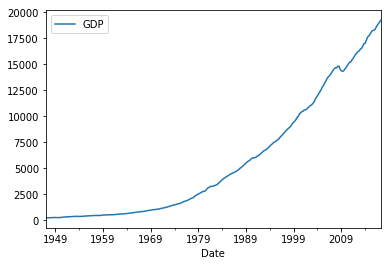

In [45]:
fredgdp.plot()
plt.legend();

In [46]:
fredgdp.to_csv('GDP.csv')

In [49]:
gdp = pd.read_csv('GDP.csv',index_col='Date')

In [50]:
gdp.head()

,GDP
Date,
1947-01-01,243.1
1947-04-01,246.3
1947-07-01,250.1
1947-10-01,260.3
1948-01-01,266.2


In [51]:
gdp.to_excel('gdp.xlsx')

In [54]:
gdp_xlsx = pd.read_excel('gdp.xlsx', index_col='Date')

In [55]:
gdp_xlsx.head()

,GDP
Date,
1947-01-01,243.1
1947-04-01,246.3
1947-07-01,250.1
1947-10-01,260.3
1948-01-01,266.2
